In [34]:
!git clone https://github.com/yashilvora19/accident_severity_prediction

Cloning into 'accident_severity_prediction'...
remote: Enumerating objects: 366, done.
remote: Counting objects: 100% (257/257), done.
remote: Compressing objects: 100% (188/188), done.
remote: Total 366 (delta 130), reused 160 (delta 66), pack-reused 109
Receiving objects: 100% (366/366), 35.68 MiB | 17.61 MiB/s, done.
Resolving deltas: 100% (179/179), done.
Error downloading object: accident_data.csv (7b035d7): Smudge error: Error downloading accident_data.csv (7b035d7af5670a527befe7ea96a8157bb10e67bcee2e57db55bc3336ce7f7c3a): batch response: This repository is over its data quota. Account responsible for LFS bandwidth should purchase more data packs to restore access.

Errors logged to /content/accident_severity_prediction/.git/lfs/logs/20240316T060756.281727347.log
Use `git lfs logs last` to view the log.
error: external filter 'git-lfs filter-process' failed
fatal: accident_data.csv: smudge filter lfs failed
You can inspect what was checked out with 'git status'
and retry with 'gi

In [111]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense


In [112]:
df= pd.read_csv('data-cleaned.csv')

In [113]:
df = df.drop('District_Area', axis = 1)
X = df.drop('Accident_Severity', axis=1)
y=df['Accident_Severity']

In [114]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [98]:
import numpy as np
category_counts = df['Accident_Severity'].value_counts()
categories = category_counts.index.values
counts = category_counts.values
print("Unique categories:", categories)
print("Counts:", counts)

Unique categories: [0 1 2]
Counts: [543637  85918   8470]


In [116]:
# y_train.replace(2, 1, inplace=True)
# print(y_train.unique())
# y_test.replace(2, 1, inplace=True)
# print(y_test.unique())

In [117]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np

brf_classifier = BalancedRandomForestClassifier(n_estimators=100, class_weight='balanced_subsample', random_state=42)

brf_classifier.fit(X_train, y_train)

y_prob = brf_classifier.predict_proba(X_test)

threshold = 0.5

y_pred_class_1 = (y_prob[:, 1] > threshold).astype(int)
y_pred_class_2 = (y_prob[:, 2] > threshold).astype(int)

y_pred_combined = np.stack((y_pred_class_1, y_pred_class_2), axis=1)
y_pred = np.max(y_pred_combined, axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.para

In [118]:
y_prob_train = brf_classifier.predict_proba(X_train)

threshold = 0.5

y_pred_class_1_train = (y_prob_train[:, 1] > threshold).astype(int)
y_pred_class_2_train = (y_prob_train[:, 2] > threshold).astype(int)

y_pred_combined_train = np.stack((y_pred_class_1_train, y_pred_class_2_train), axis=1)
y_pred_train = np.max(y_pred_combined_train, axis=1)

In [119]:
print('Classification Report for Training Data')
print(classification_report(y_train, y_pred_train))

Classification Report for Training Data


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.88      0.88      0.88    434703
           1       0.22      0.23      0.22     68985
           2       0.00      0.00      0.00      6732

    accuracy                           0.78    510420
   macro avg       0.36      0.37      0.37    510420
weighted avg       0.78      0.78      0.78    510420



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [120]:
print('Classification Report for Testing Data')
print(classification_report(y_test, y_pred))

Classification Report for Testing Data
              precision    recall  f1-score   support

           0       0.87      0.87      0.87    108934
           1       0.21      0.23      0.22     16933
           2       0.00      0.00      0.00      1738

    accuracy                           0.77    127605
   macro avg       0.36      0.37      0.36    127605
weighted avg       0.77      0.77      0.77    127605



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


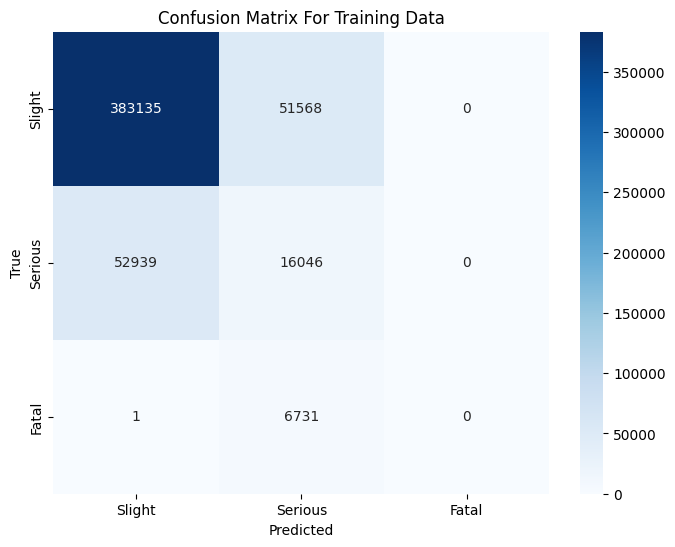

In [122]:
cm = confusion_matrix(y_train, y_pred_train)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Slight', 'Serious', 'Fatal'], yticklabels=['Slight', 'Serious','Fatal'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix For Training Data')
plt.show()

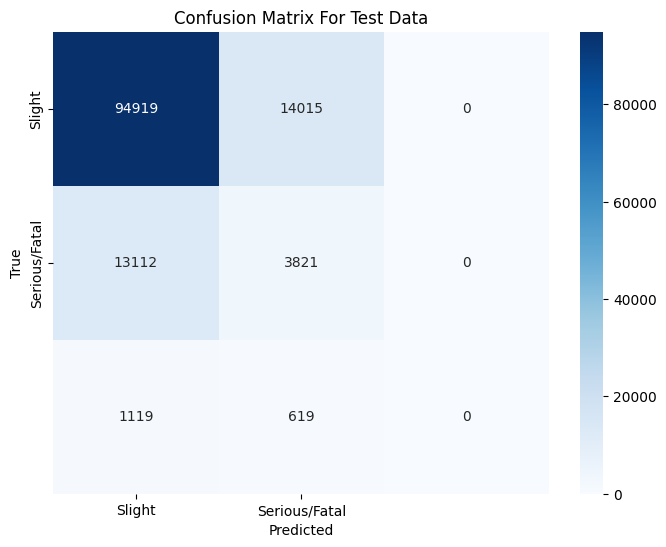

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Slight', 'Serious/Fatal'], yticklabels=['Slight', 'Serious/Fatal'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix For Test Data')
plt.show()

In [124]:
unique, counts_test = np.unique(y_test, return_counts=True)
unique, counts_test_pred = np.unique(y_pred, return_counts=True)

In [125]:
unique, counts_train = np.unique(y_train, return_counts=True)
unique, counts_train_pred = np.unique(y_pred_train, return_counts=True)


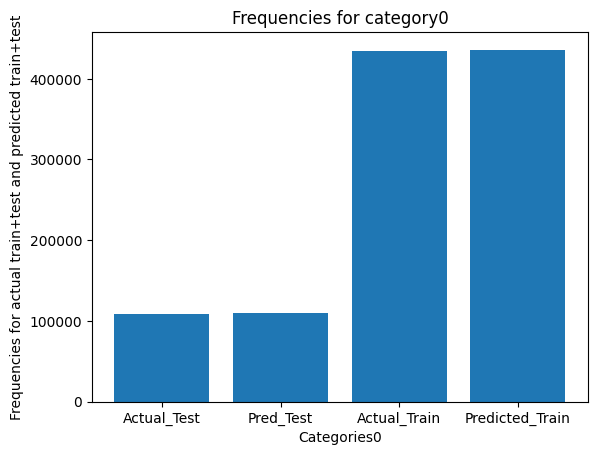

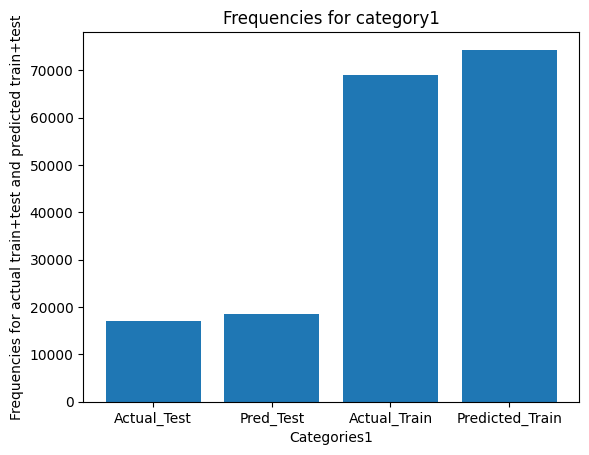

In [126]:
for i in range(0,2):
  freqs = [counts_test[i], counts_test_pred[i], counts_train[i], counts_train_pred[i]]
  plt.bar(['Actual_Test', 'Pred_Test', 'Actual_Train', 'Predicted_Train'], freqs)
  plt.xlabel('Categories' + str(i))
  plt.ylabel('Frequencies for actual train+test and predicted train+test')
  plt.title('Frequencies for category' + str(i))
  plt.show()